
Semester ling project for comp 542
By Orbel B

this file will build a neural network to be used to classify yes or no on credit card applications 

activation function: relU
Loss function:  binary cross entropy 
During training, the cross-entropy loss function exponentially increases the penalty for wrong outputs to drive the weights and biases more aggressively in the right direction.

this file will:
1) import the clean data and make x number of 
randome_state = 31


There will be 3 neural network 
    NN 1 - 1 hidden layer
    NN 2 - 3 hidden layers
    NN 3 - 5 hidden layers
    

Will have two versions of the data one with smote applied to it and the other without any smote applied to it.

In [1]:
#importing tenserflow to create the neural networks

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import pandas as p
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#getting the data
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLAG_OWN_CAR         36457 non-null  int64  
 1   FLAG_OWN_REALTY      36457 non-null  int64  
 2   ANNUAL_INCOME        36457 non-null  float64
 3   NAME_INCOME_TYPE     36457 non-null  int64  
 4   NAME_EDUCATION_TYPE  36457 non-null  int64  
 5   NAME_HOUSING_TYPE    36457 non-null  int64  
 6   AGE_YEARS            36457 non-null  float64
 7   EMPLOYMENT_LENGTH    36457 non-null  float64
 8   FLAG_WORK_PHONE      36457 non-null  int64  
 9   FLAG_PHONE           36457 non-null  int64  
 10  FLAG_EMAIL           36457 non-null  int64  
 11  STATUS               36457 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.3 MB


In [3]:
# splitting the data for training and testing
train, test = train_test_split(data, test_size=0.2)


In [4]:
def printGraph(title, hist, leg_loc='lower right'):
    acc = hist.history['accuracy']
    val = hist.history['val_accuracy']
    loss = hist.history['loss']
    loss_val = hist.history['val_loss']

    epochs = range(1, len(acc) + 1)
 
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.plot(epochs, loss_val, ':', label='Validation loss')
    plt.plot(epochs, loss, '-', label="Loss")
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=leg_loc)
    plt.grid(linestyle='-',  color='black', visible=True)
    plt.plot()
    print("ACCURACY:        ", acc[-1], "\nVAL ACCURACY:    ", val[-1], "\nVAL LOSS:        ", loss_val[-1] )

def printConfusionMatrix(model, X_test, Y_test, name='model'):
    y_predicted = model.predict(X_test) > 0.5
    mat = confusion_matrix(Y_test, y_predicted)
    labels = ['ACCEPTED', 'DENIED']
 
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

    plt.title(name + " confusion_matrix ")
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

In [5]:
#creating the first model
# this model will only have one hidden layer


#model is fidded with the data without any sampling techniques
model_ = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A", input_shape=(11,)),
        layers.Dense(1, activation="sigmoid")
    ]
)
#model is same sa previous model however the data was oversampled using SMOTE before fidding


model_.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])  
model_1 = model_
model_1_s = model_


In [6]:
#splitting the data
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [7]:
#fiting the first NN
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
hist = model_1.fit(x_train,y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.8830 - val_loss: 0.3735 - val_accuracy: 0.8795
Epoch 2/20
228/228 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8830 - val_loss: 0.3704 - val_accuracy: 0.8795
Epoch 3/20
228/228 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8830 - val_loss: 0.3690 - val_accuracy: 0.8795
Epoch 4/20
228/228 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8830 - val_loss: 0.3682 - val_accuracy: 0.8795
Epoch 5/20
228/228 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8830 - val_loss: 0.3681 - val_accuracy: 0.8795
Epoch 6/20
228/228 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8830 - val_loss: 0.3674 - val_accuracy: 0.8795
Epoch 7/20
228/228 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8830 - val_loss: 0.3678 - val_accuracy: 0.8795
Epoch 

ACCURACY:         0.8830104470252991 
VAL ACCURACY:     0.8794569373130798 
VAL LOSS:         0.3664591312408447


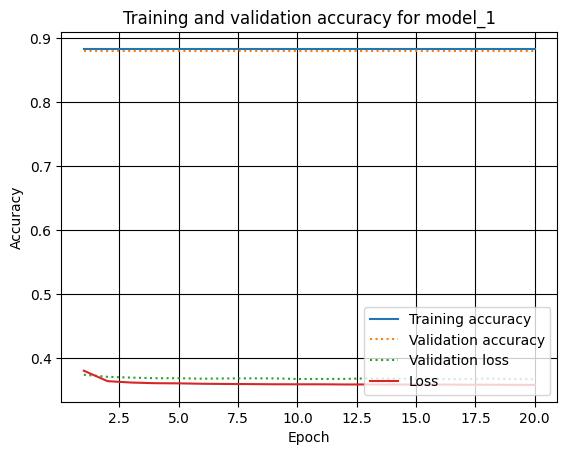

In [8]:
printGraph("Training and validation accuracy for model_1", hist)

228/228 [==============================] - 0s 1ms/step


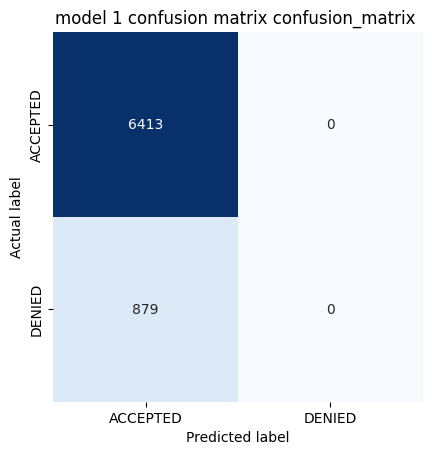

In [9]:
printConfusionMatrix(model_1, x_test, y_test, name="model 1 confusion matrix")

Model_1 accuracy may be high however it hasnt learned anything. Since our data is oversampled with a majority being good clients and a minority being bad clients, our NN hasnt really learned the diffrnece between a good or bad client.

Now using SMOTE

In [10]:
#now oversampling the data using smote
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

In [11]:
#double checking if dataset is 50/50
y_train_s.value_counts(normalize=True)

0    0.5
1    0.5
Name: STATUS, dtype: float64

In [12]:
hist_s = model_1_s.fit(x_train_s,y_train_s, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
403/403 [==============================] - 1s 2ms/step - loss: 0.7003 - accuracy: 0.5270 - val_loss: 0.7045 - val_accuracy: 0.4506
Epoch 2/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6866 - accuracy: 0.5448 - val_loss: 0.6776 - val_accuracy: 0.5911
Epoch 3/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6851 - accuracy: 0.5474 - val_loss: 0.6780 - val_accuracy: 0.5893
Epoch 4/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6841 - accuracy: 0.5498 - val_loss: 0.6961 - val_accuracy: 0.5233
Epoch 5/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6832 - accuracy: 0.5541 - val_loss: 0.6941 - val_accuracy: 0.5118
Epoch 6/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6826 - accuracy: 0.5579 - val_loss: 0.6514 - val_accuracy: 0.6532
Epoch 7/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6816 - accuracy: 0.5620 - val_loss: 0.7537 - val_accuracy: 0.3487

ACCURACY:         0.5729235410690308 
VAL ACCURACY:     0.6339824199676514 
VAL LOSS:         0.6461852788925171


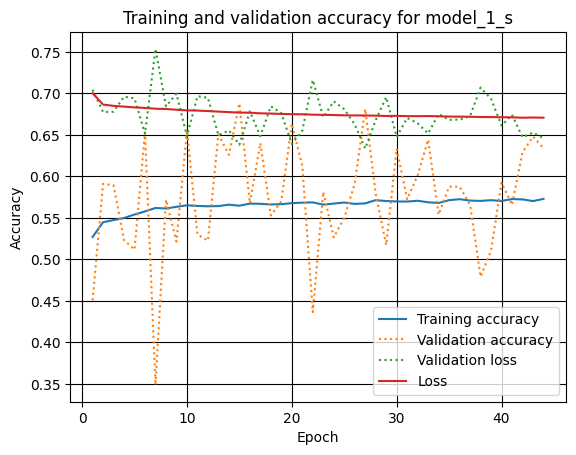

In [13]:
printGraph("Training and validation accuracy for model_1_s", hist_s)

228/228 [==============================] - 0s 1ms/step


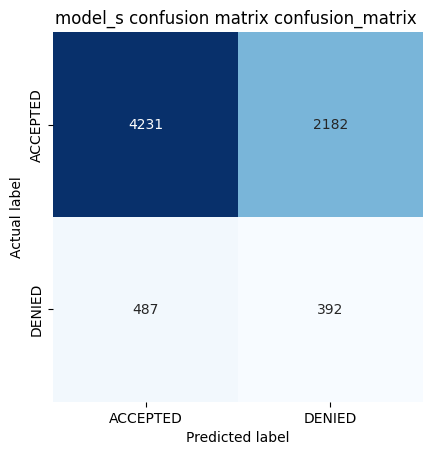

In [14]:
printConfusionMatrix(model_1_s, x_test,y_test, name="model_s confusion matrix")

END OF FILE
PLEASE GO TO NN_model_2.ipynb for the next "generation" of model to better classify good and bed clients